In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [2]:
from sklearn.preprocessing import LabelEncoder


def convert_category_into_integer(df: pd.DataFrame, columns: list):

    label_encoders = {}  # 각 열의 LabelEncoder 객체를 저장할 딕셔너리입니다.
    
    for column in columns:
        # 각 열에 대해 LabelEncoder 객체를 생성합니다.
        label_encoder = LabelEncoder()
        
        # LabelEncoder를 사용하여 해당 열의 범주형 데이터를 정수형으로 변환합니다.
        df.loc[:, column] = label_encoder.fit_transform(df[column])
        
        # 변환된 LabelEncoder 객체를 딕셔너리에 저장합니다.
        label_encoders.update({column: label_encoder})
    
    # 변환된 데이터프레임과 LabelEncoder 객체를 포함하는 딕셔너리를 반환합니다.
    return df, label_encoders

In [3]:
data = pd.read_csv('./data/train.csv')

In [4]:
data = data.dropna()

In [5]:
data, _ = convert_category_into_integer(data, ('Churn','ServiceArea','ChildrenInHH','HandsetRefurbished','HandsetWebCapable','TruckOwner','RVOwner','Homeownership','BuysViaMailOrder','RespondsToMailOffers','OptOutMailings','NonUSTravel','OwnsComputer','HasCreditCard','NewCellphoneUser','NotNewCellphoneUser','OwnsMotorcycle','HandsetPrice','MadeCallToRetentionTeam','CreditRating','PrizmCode','Occupation','MaritalStatus'))

In [6]:
data[['Churn','ServiceArea','ChildrenInHH','HandsetRefurbished','HandsetWebCapable','TruckOwner','RVOwner','Homeownership','BuysViaMailOrder','RespondsToMailOffers','OptOutMailings','NonUSTravel','OwnsComputer','HasCreditCard','NewCellphoneUser','NotNewCellphoneUser','OwnsMotorcycle','HandsetPrice','MadeCallToRetentionTeam','CreditRating','PrizmCode','Occupation','MaritalStatus']]=data[['Churn','ServiceArea','ChildrenInHH','HandsetRefurbished','HandsetWebCapable','TruckOwner','RVOwner','Homeownership','BuysViaMailOrder','RespondsToMailOffers','OptOutMailings','NonUSTravel','OwnsComputer','HasCreditCard','NewCellphoneUser','NotNewCellphoneUser','OwnsMotorcycle','HandsetPrice','MadeCallToRetentionTeam','CreditRating','PrizmCode','Occupation','MaritalStatus']].astype(int)

In [7]:
data

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,1,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,0,0,8,1,0,2,4,0
1,3000010,1,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,0,0,8,0,3,2,4,2
2,3000014,0,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,0,0,15,0,2,3,1,2
3,3000022,0,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,0,0,0,0,3,0,3,0
4,3000026,1,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,0,1,0,0,0,0,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51035,3399894,0,0.00,76.0,30.0,0.00,0.0,0.0,0.0,0.0,...,0,4,0,0,15,0,1,0,4,0
51037,3399906,0,31.92,63.0,17.0,0.00,43.0,0.0,-38.0,-13.2,...,0,3,0,0,15,0,2,0,3,2
51040,3399942,0,71.99,724.0,70.0,0.00,4.0,0.9,-40.0,-2.0,...,0,7,0,0,15,0,0,0,4,1
51041,3399946,1,117.49,384.0,30.0,0.00,250.0,0.0,0.0,0.0,...,0,2,0,0,8,0,4,0,4,2


<Axes: xlabel='MonthlyRevenue', ylabel='Density'>

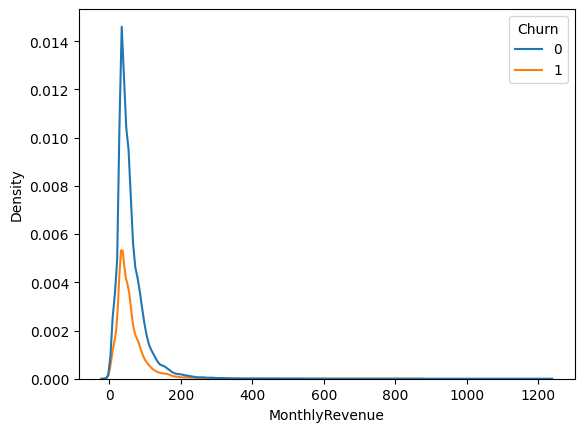

In [9]:
sns.kdeplot(x="MonthlyRevenue", data=data, hue='Churn')

<Axes: xlabel='MonthlyMinutes', ylabel='Density'>

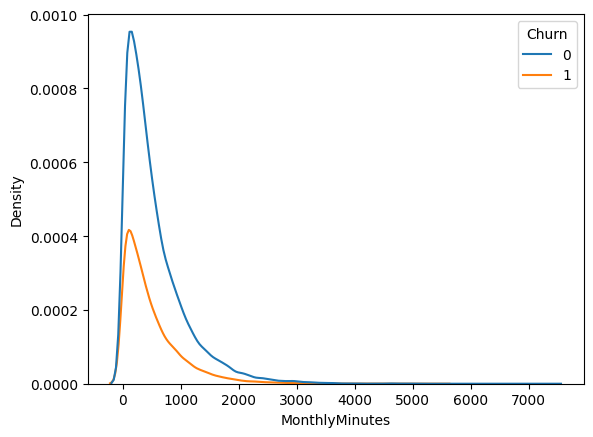

In [10]:
sns.kdeplot(x="MonthlyMinutes", data=data,hue='Churn')

<Axes: xlabel='TotalRecurringCharge', ylabel='Density'>

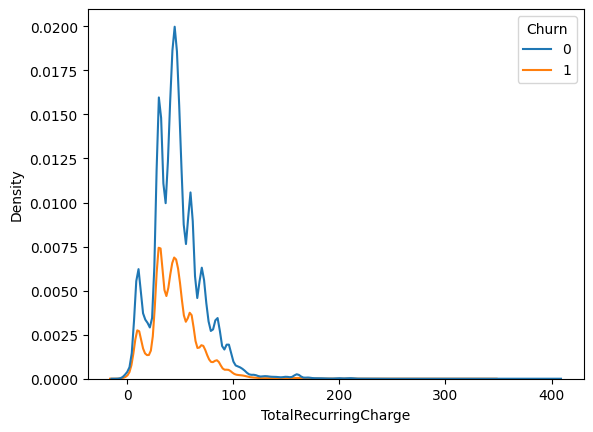

In [12]:
sns.kdeplot(x="TotalRecurringCharge", data=data, hue='Churn')

<Axes: xlabel='DirectorAssistedCalls', ylabel='Density'>

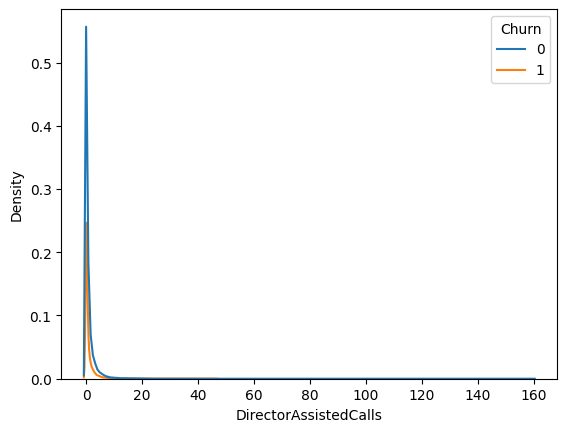

In [16]:
sns.kdeplot(x="DirectorAssistedCalls", data=data, hue='Churn')

<Axes: xlabel='OverageMinutes', ylabel='Density'>

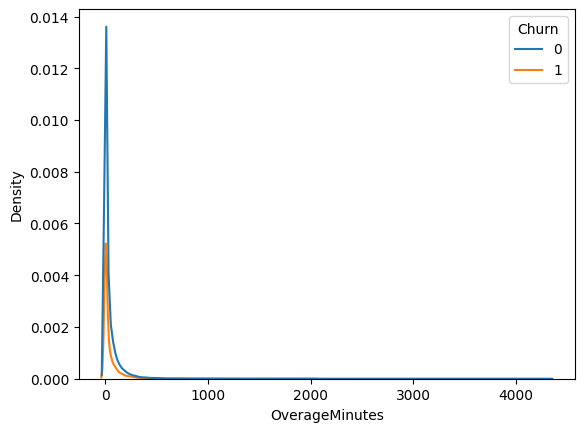

In [22]:
sns.kdeplot(x="OverageMinutes", data=data, hue='Churn')

<Axes: xlabel='RoamingCalls', ylabel='Density'>

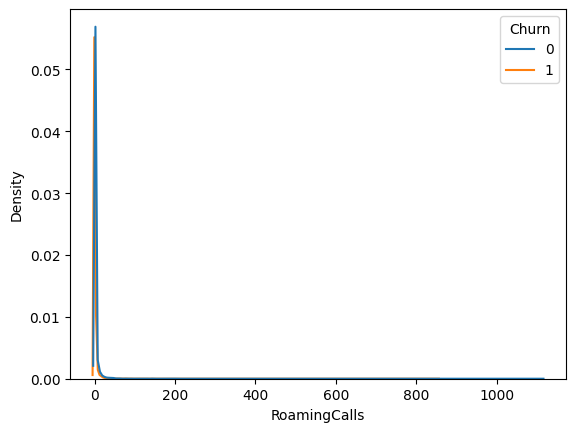

In [20]:
sns.kdeplot(x="RoamingCalls", data=data, hue='Churn')

<Axes: xlabel='RoamingCalls', ylabel='Density'>

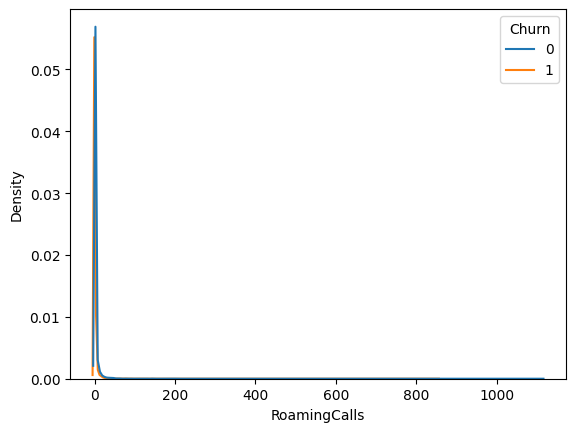

In [25]:
sns.kdeplot(x="RoamingCalls", data=data, hue='Churn')

<Axes: xlabel='PercChangeMinutes', ylabel='Density'>

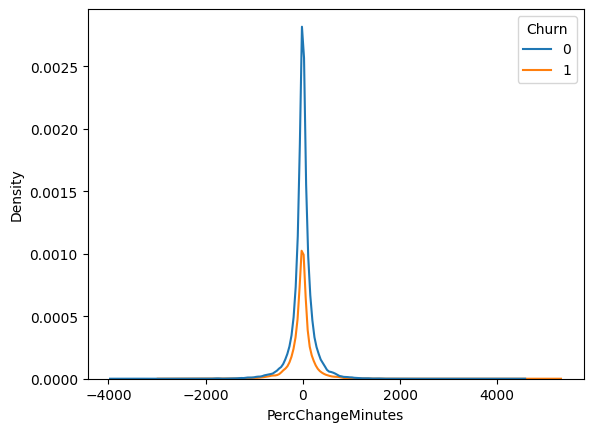

In [28]:
sns.kdeplot(x="PercChangeMinutes", data=data, hue='Churn')

<Axes: xlabel='DroppedCalls', ylabel='Density'>

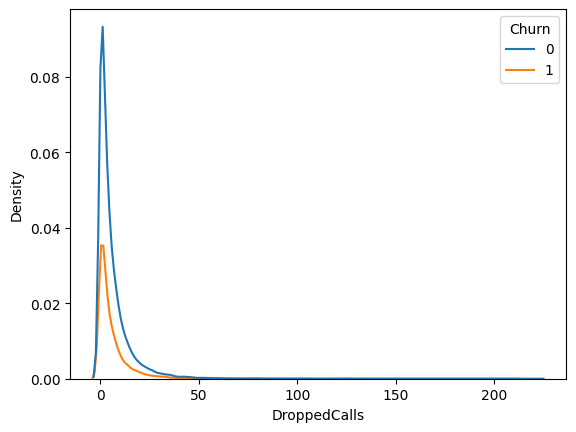

In [32]:
sns.kdeplot(x="DroppedCalls", data=data, hue='Churn')

<Axes: xlabel='BlockedCalls', ylabel='Density'>

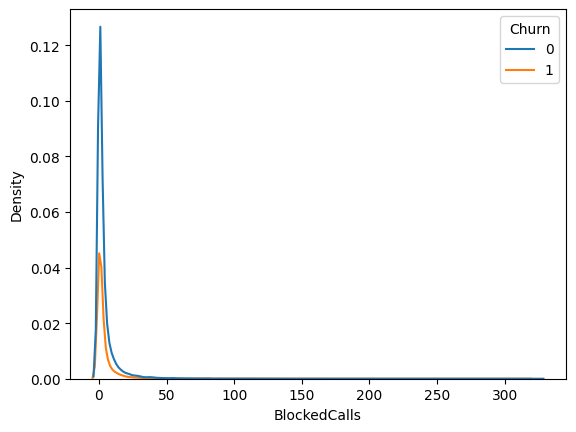

In [33]:
sns.kdeplot(x="BlockedCalls", data=data, hue='Churn')

<Axes: xlabel='UnansweredCalls', ylabel='Density'>

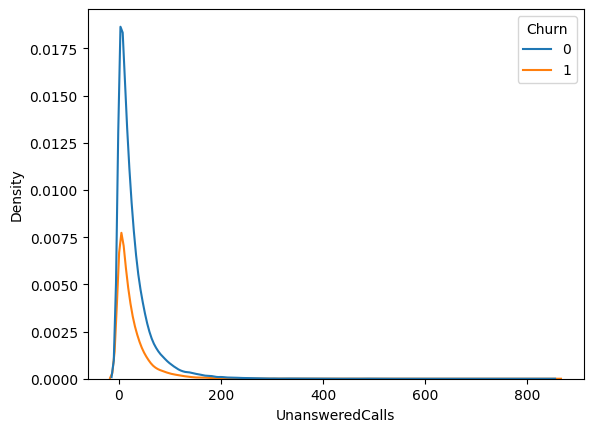

In [35]:
sns.kdeplot(x="UnansweredCalls", data=data, hue='Churn')

<Axes: xlabel='CustomerCareCalls', ylabel='Density'>

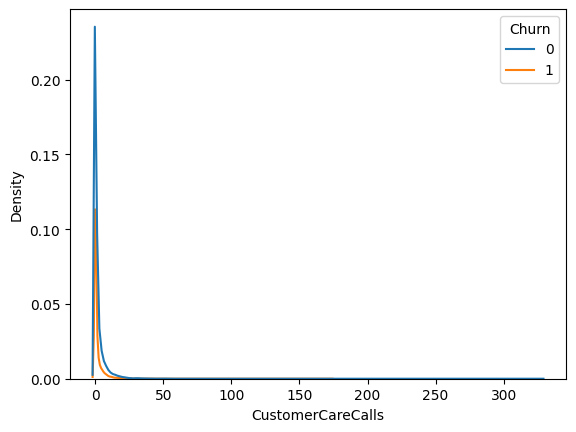

In [37]:
sns.kdeplot(x="CustomerCareCalls", data=data, hue='Churn')

<Axes: xlabel='ThreewayCalls', ylabel='Density'>

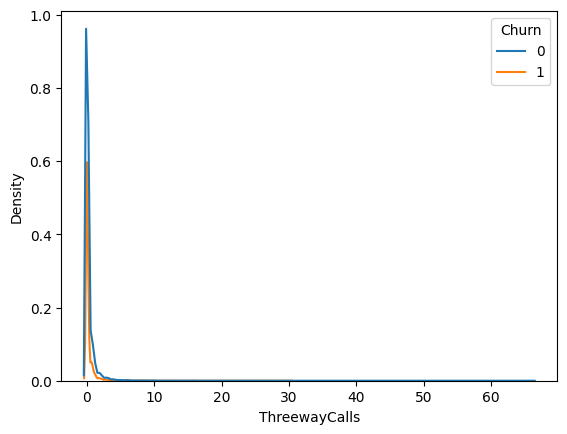

In [39]:
sns.kdeplot(x="ThreewayCalls", data=data, hue='Churn')

<Axes: xlabel='ReceivedCalls', ylabel='Density'>

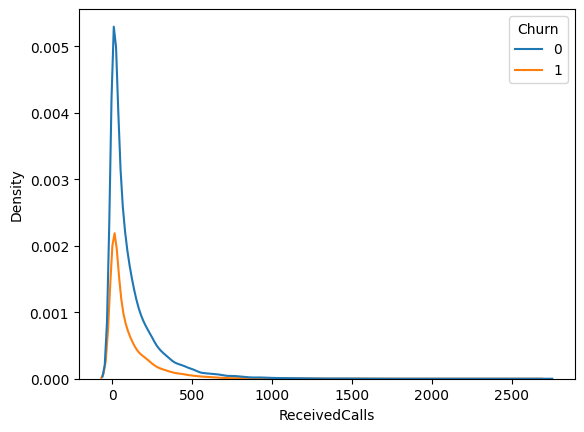

In [41]:
sns.kdeplot(x="ReceivedCalls", data=data, hue='Churn')

<Axes: xlabel='OutboundCalls', ylabel='Density'>

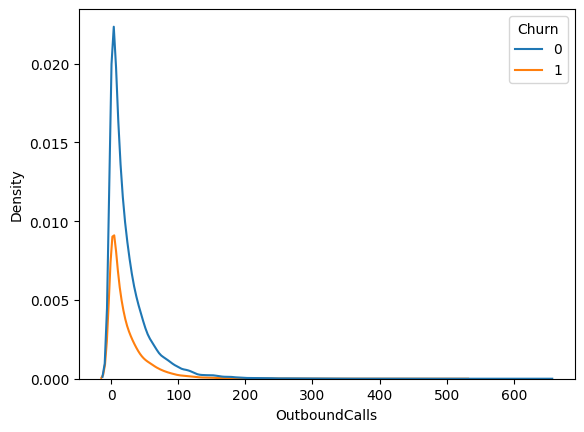

In [43]:
sns.kdeplot(x="OutboundCalls", data=data, hue='Churn')

<Axes: xlabel='InboundCalls', ylabel='Density'>

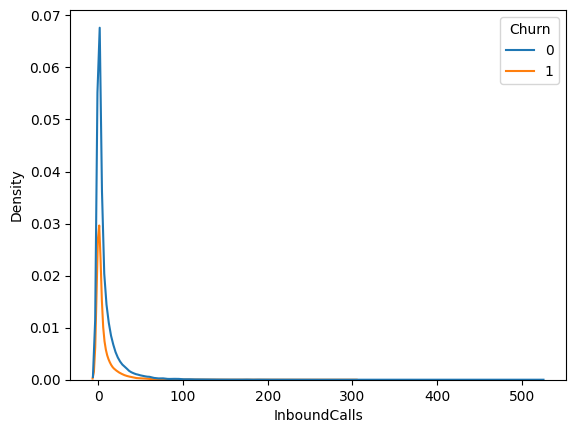

In [44]:
sns.kdeplot(x="InboundCalls", data=data, hue='Churn')

<Axes: xlabel='PeakCallsInOut', ylabel='Density'>

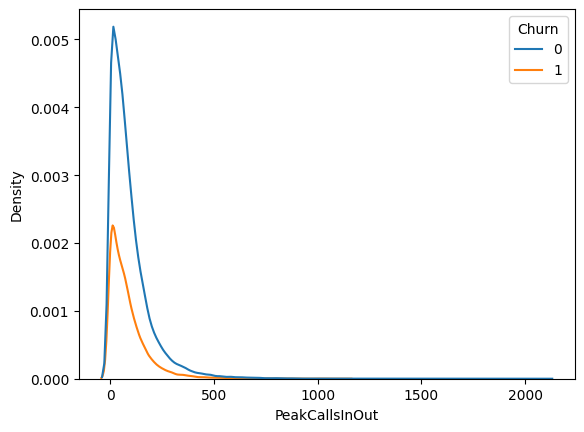

In [45]:
sns.kdeplot(x="PeakCallsInOut", data=data, hue='Churn')

<Axes: xlabel='OffPeakCallsInOut', ylabel='Density'>

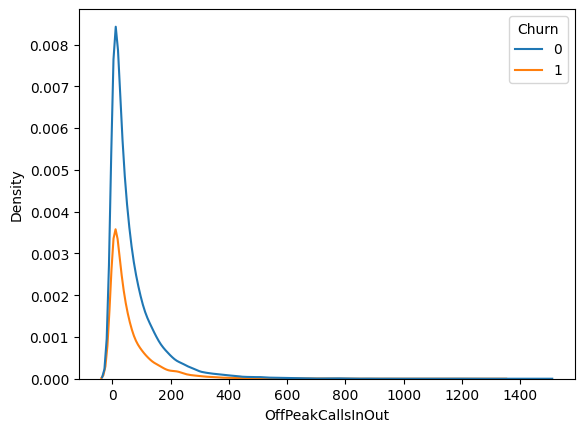

In [47]:
sns.kdeplot(x="OffPeakCallsInOut", data=data, hue='Churn')

<Axes: xlabel='DroppedBlockedCalls', ylabel='Density'>

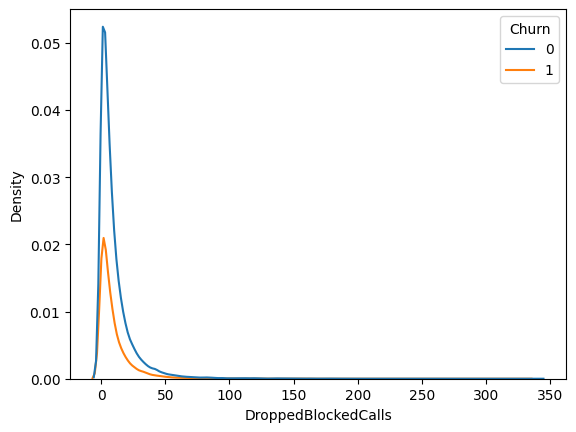

In [48]:
sns.kdeplot(x="DroppedBlockedCalls", data=data, hue='Churn')

<Axes: xlabel='CallForwardingCalls', ylabel='Density'>

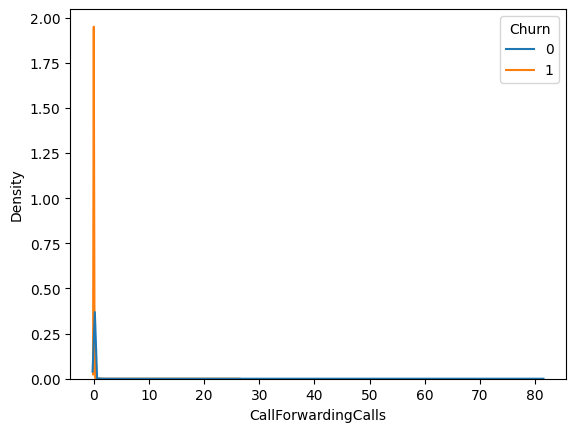

In [49]:
sns.kdeplot(x="CallForwardingCalls", data=data, hue='Churn')

<Axes: xlabel='CallWaitingCalls', ylabel='Density'>

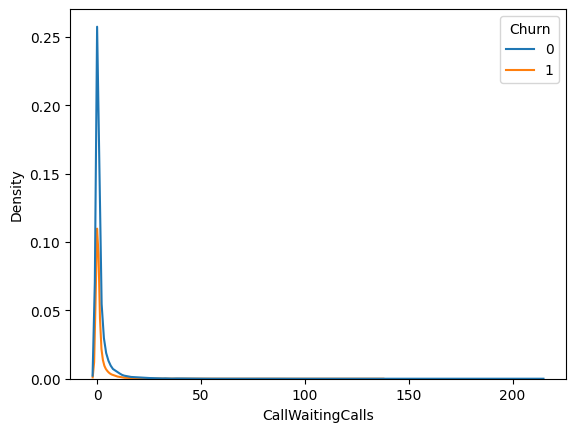

In [50]:
sns.kdeplot(x="CallWaitingCalls", data=data, hue='Churn')

<Axes: xlabel='MonthsInService', ylabel='Density'>

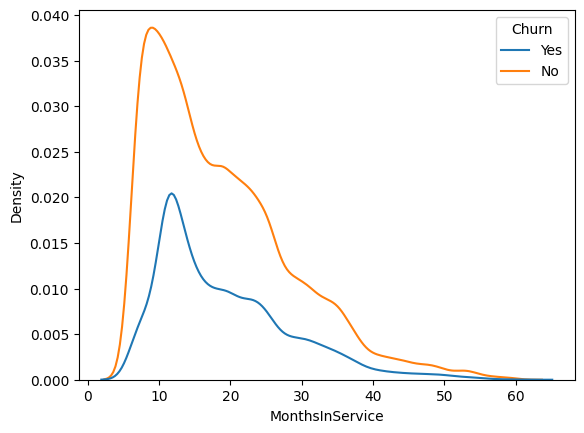

In [12]:
sns.kdeplot(x="MonthsInService", data=data,hue='Churn')

<Axes: xlabel='UniqueSubs', ylabel='count'>

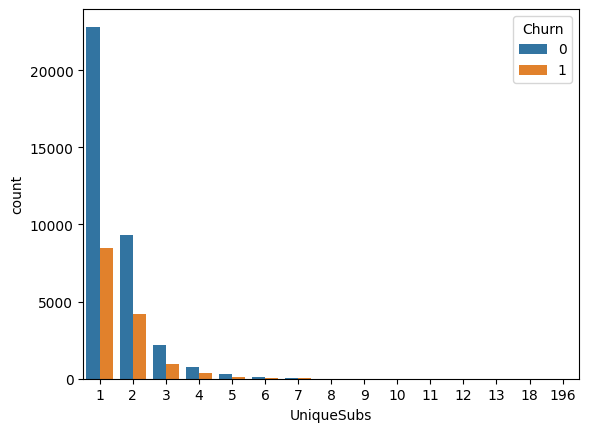

In [52]:
sns.countplot(x="UniqueSubs", data=data, hue='Churn')

<Axes: xlabel='ActiveSubs', ylabel='count'>

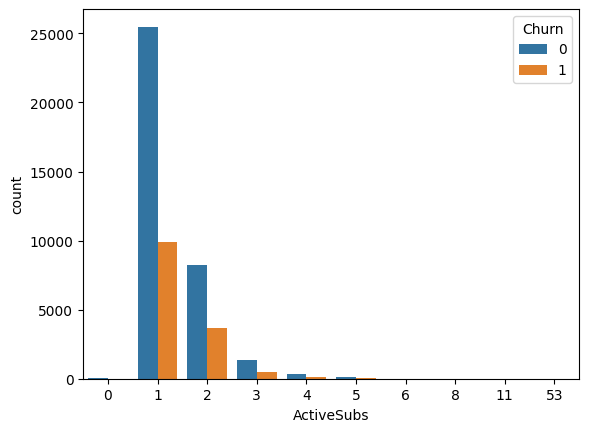

In [55]:
sns.countplot(x="ActiveSubs", data=data, hue='Churn')

<Axes: xlabel='ServiceArea', ylabel='Density'>

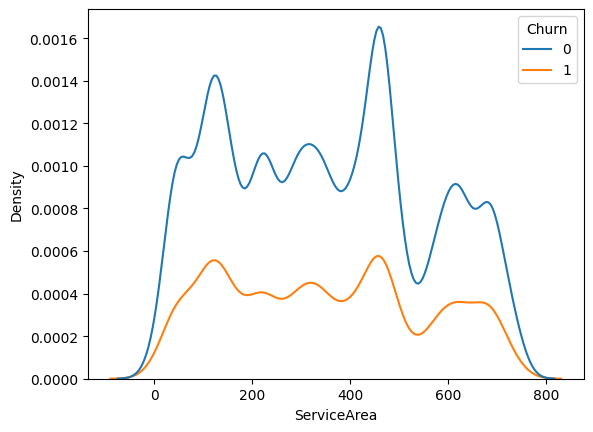

In [57]:
sns.kdeplot(x="ServiceArea", data=data, hue='Churn')

<Axes: xlabel='Handsets', ylabel='Density'>

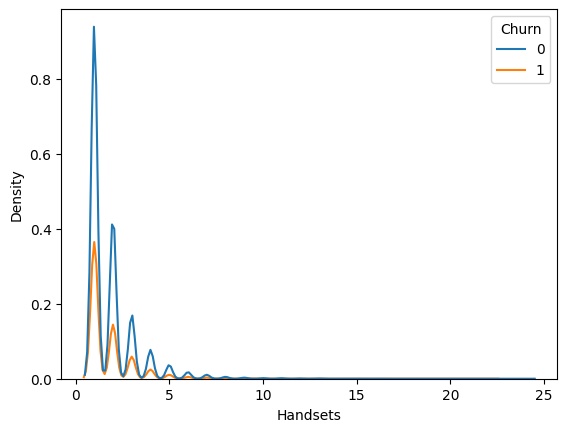

In [63]:
sns.kdeplot(x="Handsets", data=data, hue='Churn')

<Axes: xlabel='Handsets', ylabel='Density'>

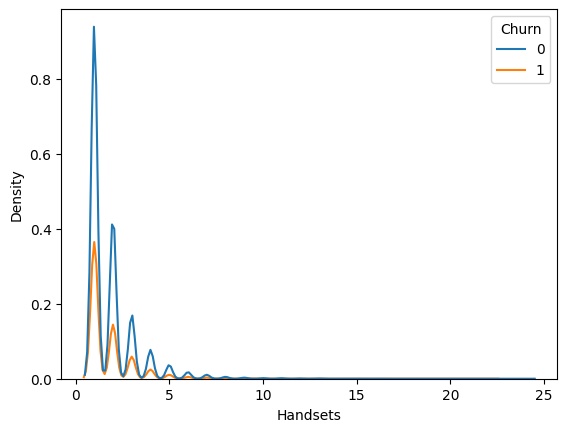

In [62]:
sns.kdeplot(x="Handsets", data=data, hue='Churn')

<Axes: xlabel='HandsetModels', ylabel='Density'>

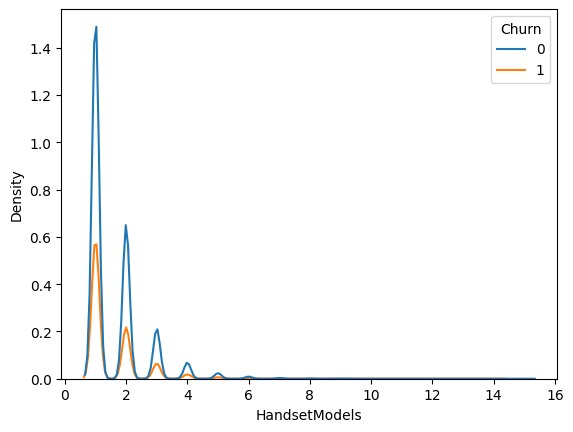

In [64]:
sns.kdeplot(x="HandsetModels", data=data, hue='Churn')

<Axes: xlabel='HandsetModels', ylabel='Density'>

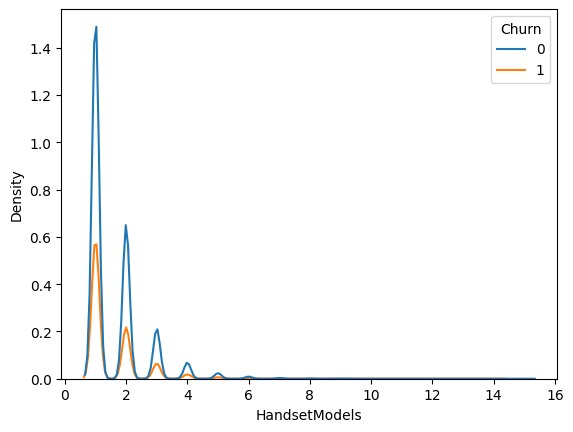

In [65]:
sns.kdeplot(x="HandsetModels", data=data, hue='Churn')

<Axes: xlabel='CurrentEquipmentDays', ylabel='Density'>

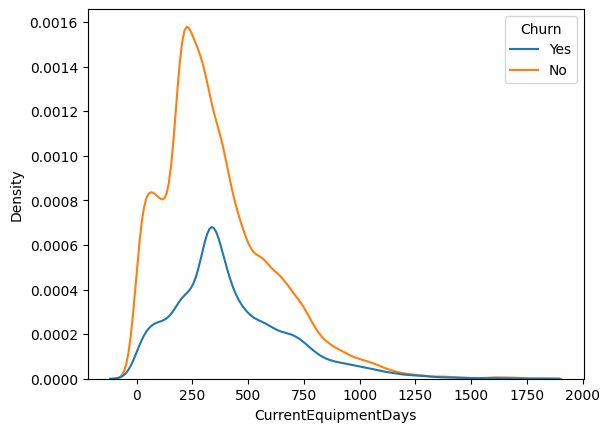

In [13]:
sns.kdeplot(x="CurrentEquipmentDays", data=data,hue='Churn')

<Axes: xlabel='CurrentEquipmentDays', ylabel='Density'>

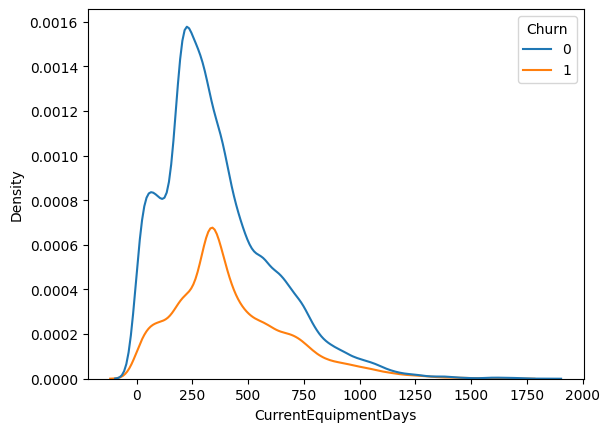

In [66]:
sns.kdeplot(x="CurrentEquipmentDays", data=data, hue='Churn')

<Axes: xlabel='AgeHH1', ylabel='Density'>

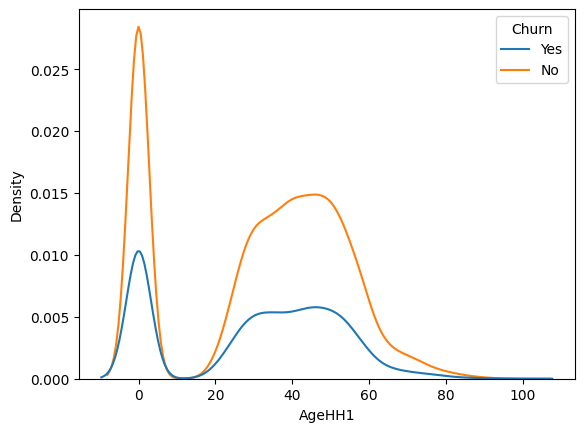

In [14]:
sns.kdeplot(x="AgeHH1", data=data,hue='Churn')

<Axes: xlabel='AgeHH1', ylabel='Density'>

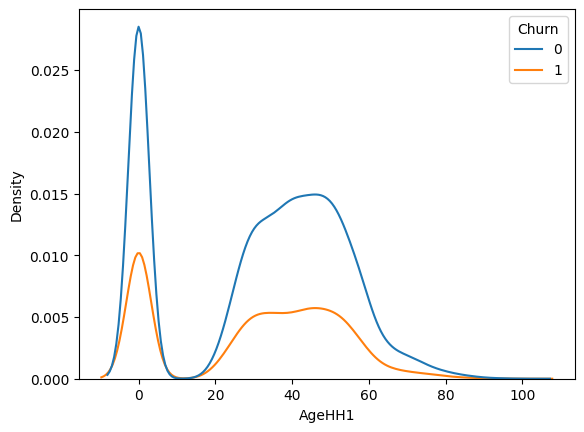

In [67]:
sns.kdeplot(x="AgeHH1", data=data, hue='Churn')

<Axes: xlabel='ChildrenInHH', ylabel='count'>

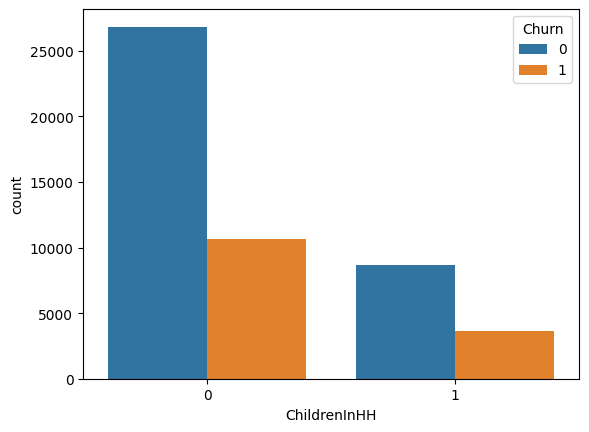

In [68]:
sns.countplot(x="ChildrenInHH", data=data, hue='Churn')

<Axes: xlabel='HandsetRefurbished', ylabel='count'>

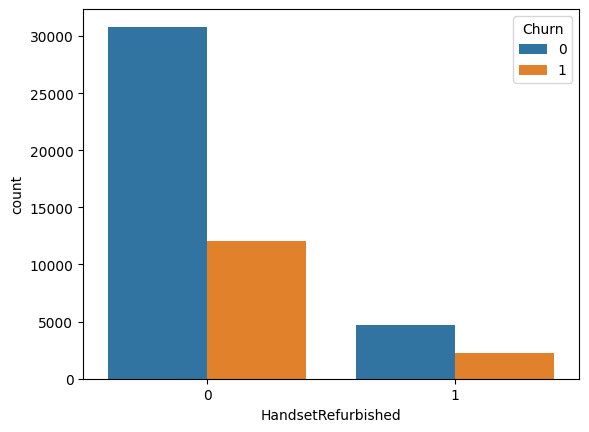

In [70]:
sns.countplot(x="HandsetRefurbished", data=data, hue='Churn')

<Axes: xlabel='HandsetWebCapable', ylabel='count'>

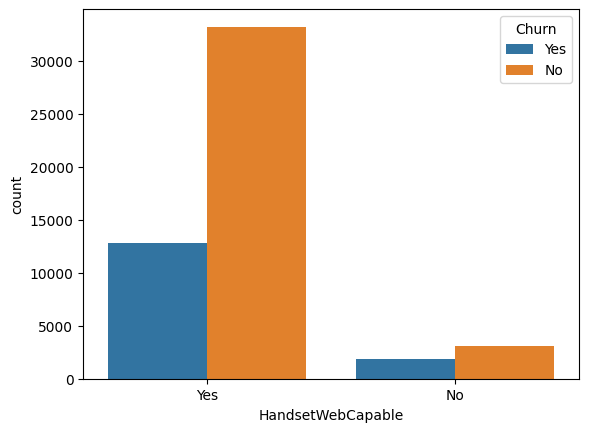

In [22]:
sns.countplot(x="HandsetWebCapable", data=data,hue='Churn')

<Axes: xlabel='TruckOwner', ylabel='count'>

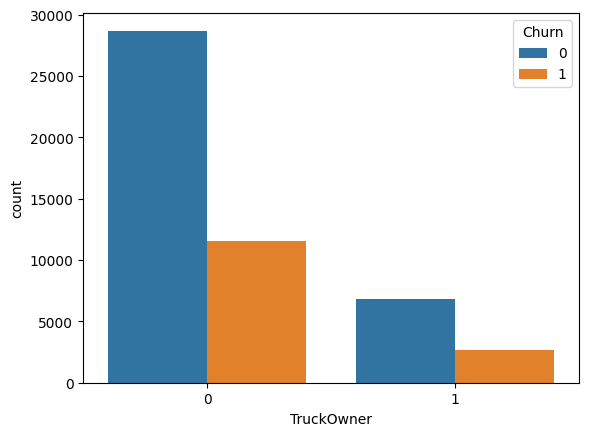

In [72]:
sns.countplot(x="TruckOwner", data=data, hue='Churn')

<Axes: xlabel='RVOwner', ylabel='count'>

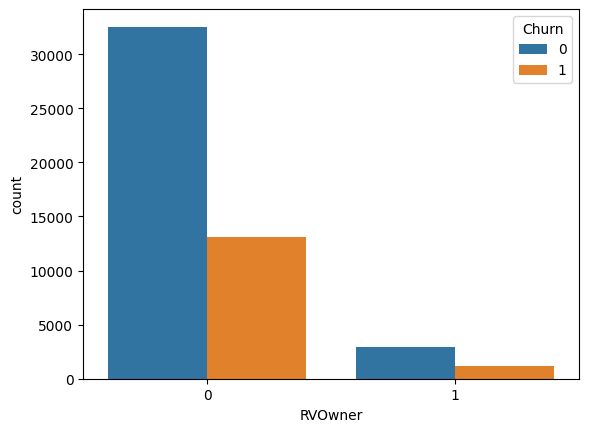

In [73]:
sns.countplot(x="RVOwner", data=data, hue='Churn')

<Axes: xlabel='Homeownership', ylabel='count'>

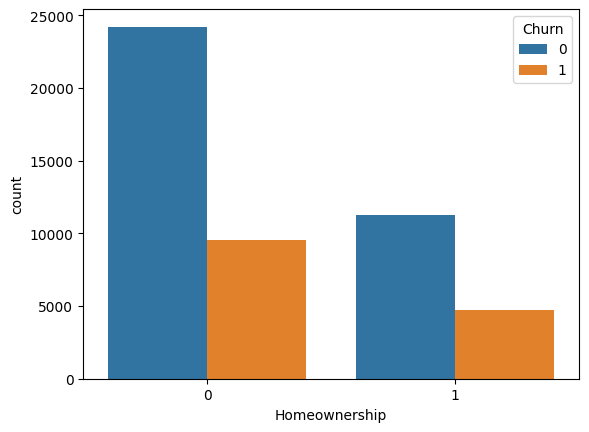

In [74]:
sns.countplot(x="Homeownership", data=data, hue='Churn')

<Axes: xlabel='BuysViaMailOrder', ylabel='count'>

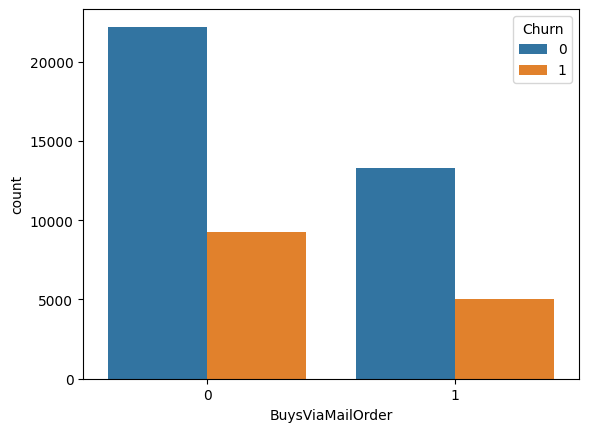

In [76]:
sns.countplot(x="BuysViaMailOrder", data=data, hue='Churn')

<Axes: xlabel='RespondsToMailOffers', ylabel='count'>

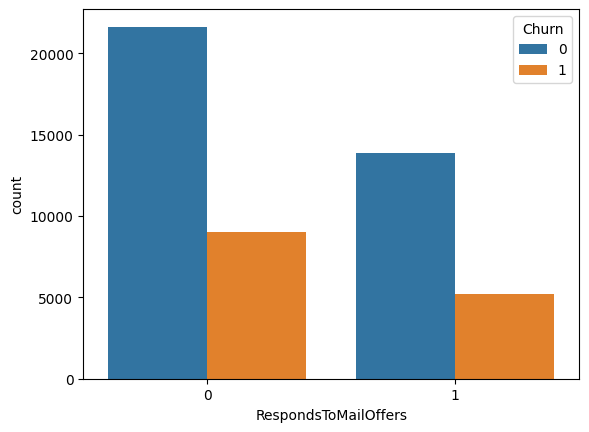

In [78]:
sns.countplot(x="RespondsToMailOffers", data=data,hue='Churn')

<Axes: xlabel='OptOutMailings', ylabel='count'>

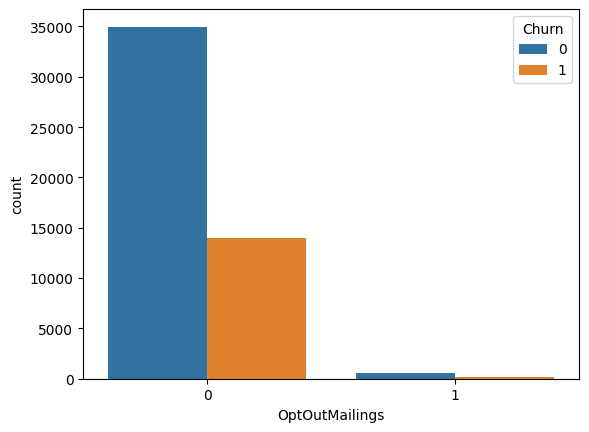

In [80]:
sns.countplot(x="OptOutMailings", data=data, hue='Churn')

<Axes: xlabel='NonUSTravel', ylabel='count'>

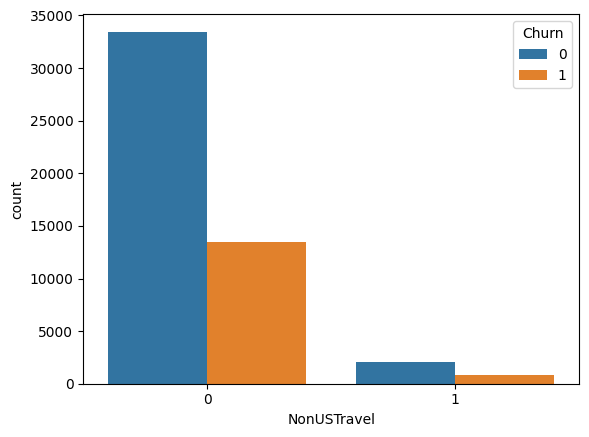

In [81]:
sns.countplot(x="NonUSTravel", data=data, hue='Churn')

<Axes: xlabel='OwnsComputer', ylabel='count'>

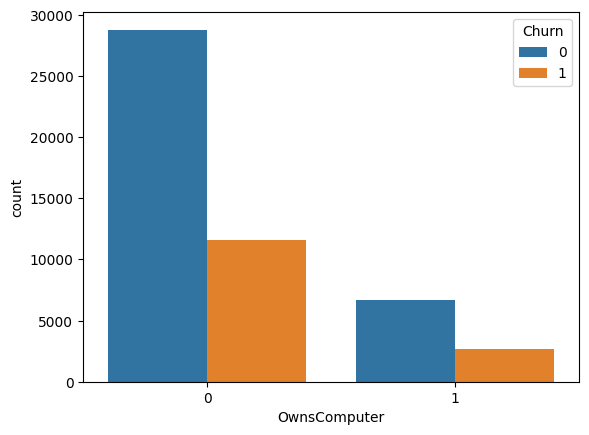

In [82]:
sns.countplot(x="OwnsComputer", data=data, hue='Churn')

<Axes: xlabel='HasCreditCard', ylabel='count'>

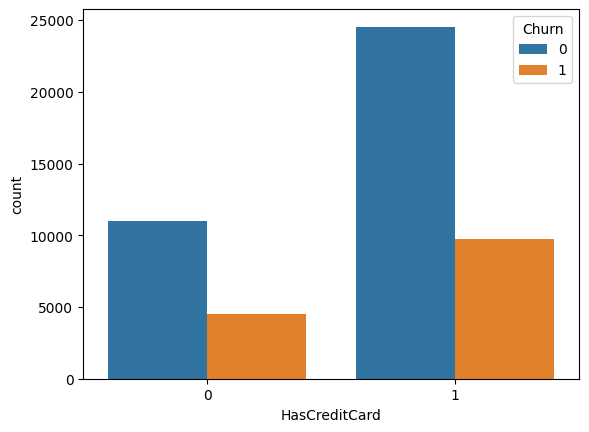

In [83]:
sns.countplot(x="HasCreditCard", data=data, hue='Churn')

<Axes: xlabel='RetentionCalls', ylabel='count'>

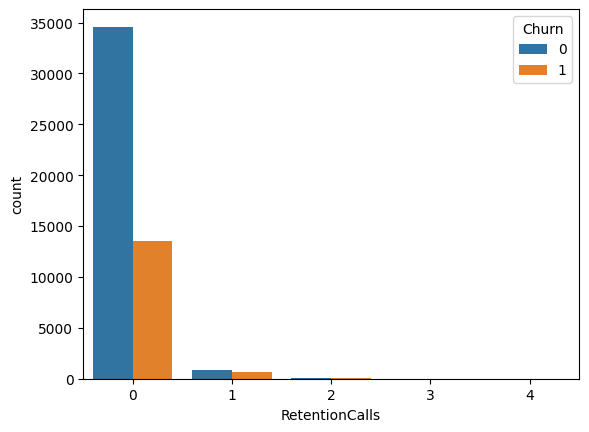

In [85]:
sns.countplot(x="RetentionCalls", data=data,hue='Churn')

<Axes: xlabel='RetentionOffersAccepted', ylabel='count'>

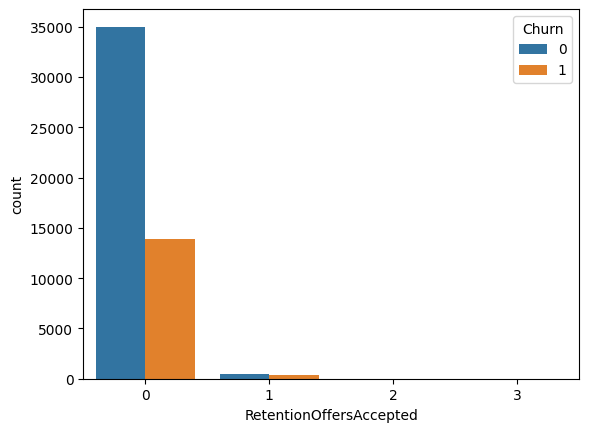

In [86]:
sns.countplot(x="RetentionOffersAccepted", data=data, hue='Churn')

<Axes: xlabel='NewCellphoneUser', ylabel='count'>

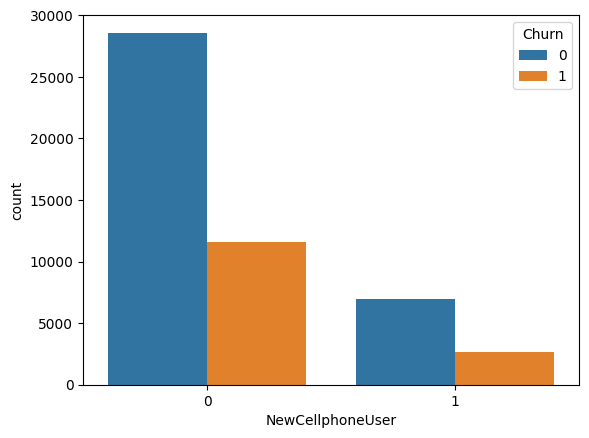

In [87]:
sns.countplot(x="NewCellphoneUser", data=data, hue='Churn')

<Axes: xlabel='NotNewCellphoneUser', ylabel='count'>

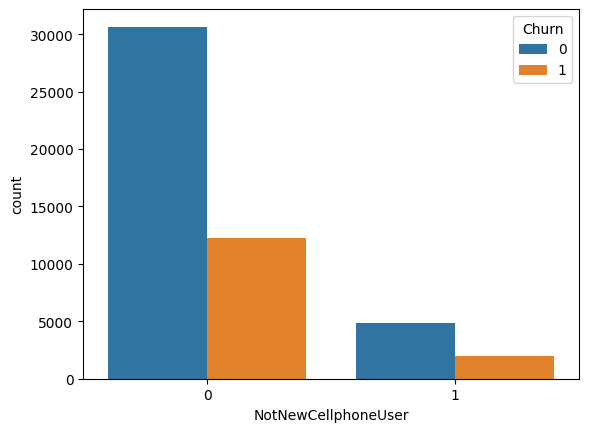

In [88]:
sns.countplot(x="NotNewCellphoneUser", data=data, hue='Churn')

<Axes: xlabel='ReferralsMadeBySubscriber', ylabel='count'>

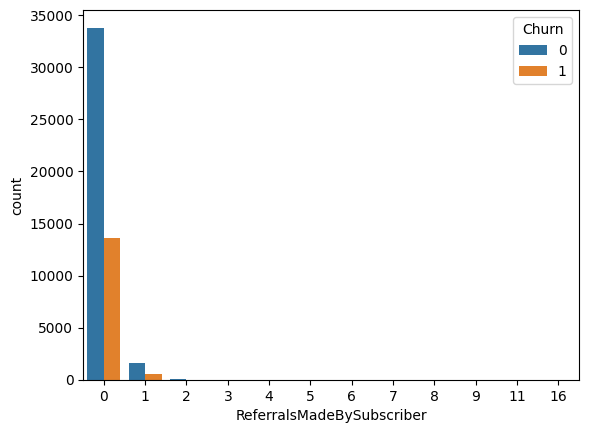

In [89]:
sns.countplot(x="ReferralsMadeBySubscriber", data=data, hue='Churn')

<Axes: xlabel='IncomeGroup', ylabel='count'>

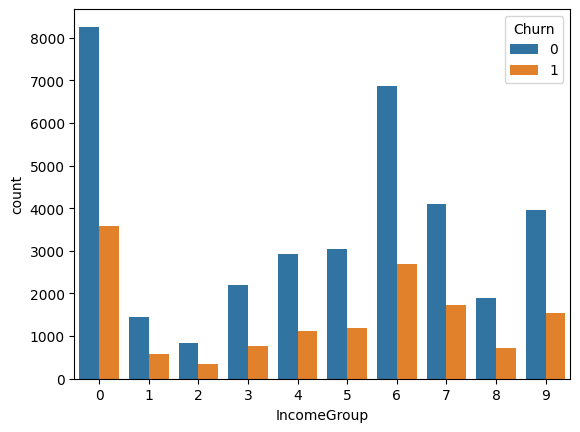

In [90]:
sns.countplot(x="IncomeGroup", data=data, hue='Churn')

<Axes: xlabel='OwnsMotorcycle', ylabel='count'>

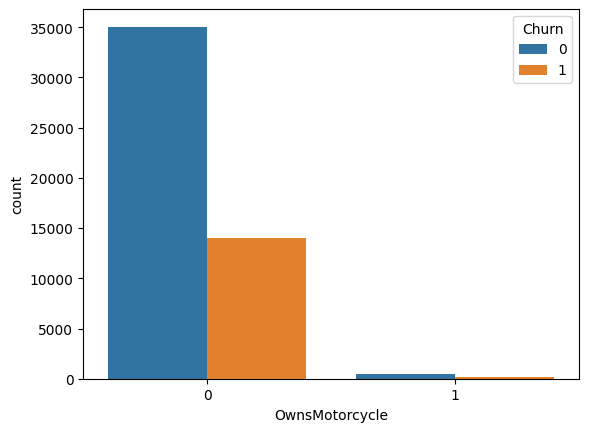

In [91]:
sns.countplot(x="OwnsMotorcycle", data=data, hue='Churn')

<Axes: xlabel='AdjustmentsToCreditRating', ylabel='count'>

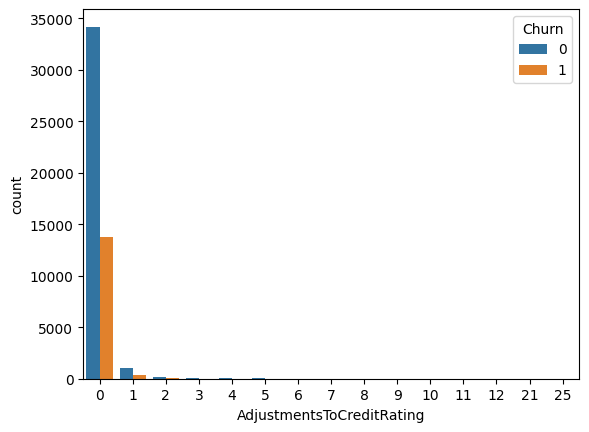

In [99]:
sns.countplot(x="AdjustmentsToCreditRating",  data=data,hue='Churn')

<Axes: xlabel='HandsetPrice', ylabel='count'>

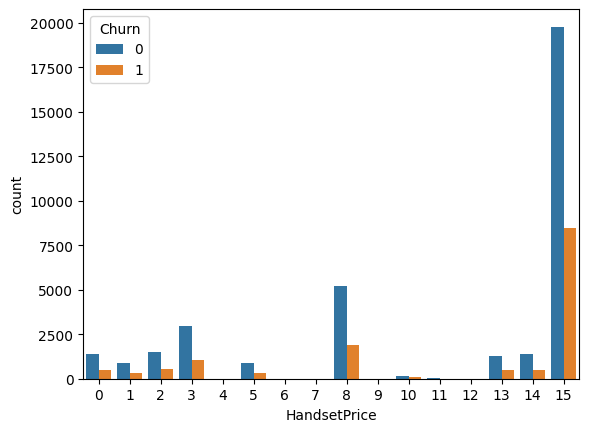

In [103]:
sns.countplot(x='HandsetPrice', data=data, hue='Churn')

<Axes: xlabel='MadeCallToRetentionTeam', ylabel='count'>

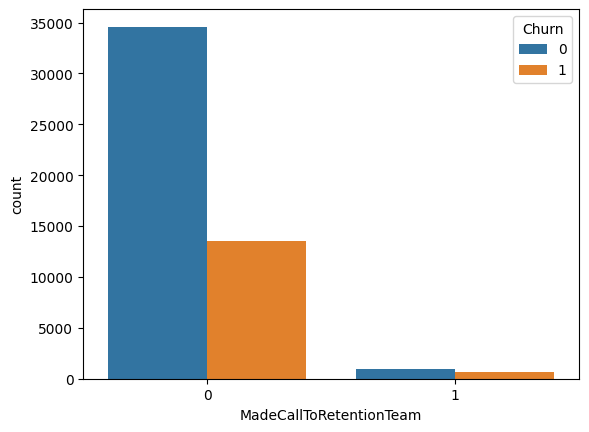

In [93]:
sns.countplot(x="MadeCallToRetentionTeam", data=data, hue='Churn')

<Axes: xlabel='CreditRating', ylabel='count'>

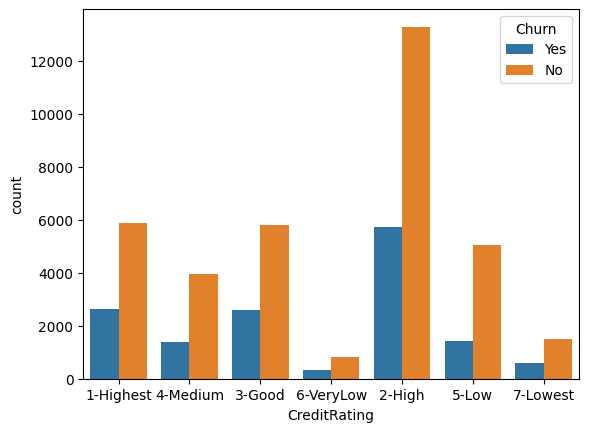

In [16]:
sns.countplot(x="CreditRating",  data=data,hue='Churn')

<Axes: xlabel='PrizmCode', ylabel='count'>

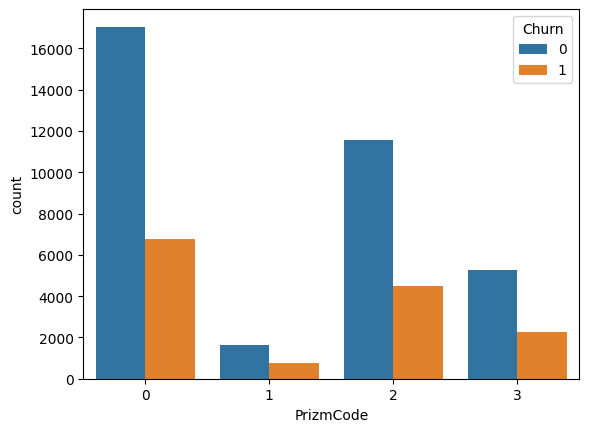

In [94]:
sns.countplot(x="PrizmCode", data=data, hue='Churn')

<Axes: xlabel='Occupation', ylabel='count'>

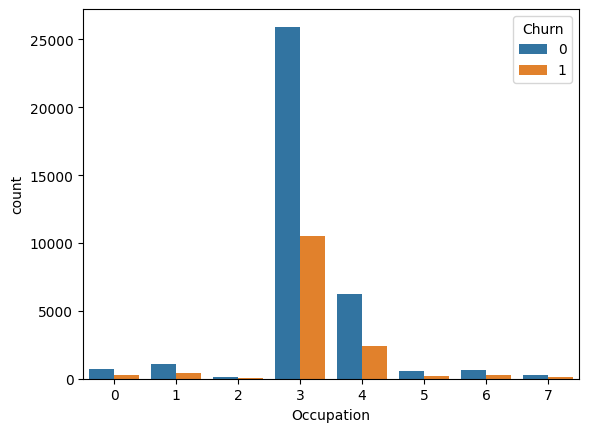

In [95]:
sns.countplot(x="Occupation", data=data, hue='Churn')

<Axes: xlabel='MaritalStatus', ylabel='count'>

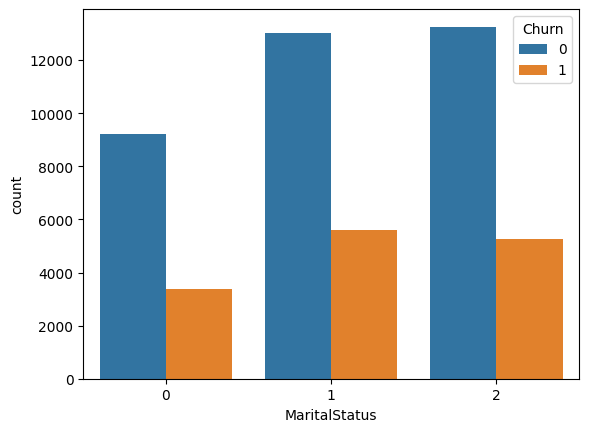

In [96]:
sns.countplot(x="MaritalStatus", data=data, hue='Churn')